In [175]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [378]:
df=pd.read_csv('Credit_Data.csv.csv')
df

,default,account_check_status,duration_in_month,credit_history,purpose,credit_amount,savings,present_emp_since,installment_as_income_perc,personal_status_sex,...,present_res_since,property,age,other_installment_plans,housing,credits_this_bank,job,people_under_maintenance,telephone,foreign_worker
0,0,< 0 DM,6,critical account/ other credits existing (not ...,domestic appliances,1169,unknown/ no savings account,.. >= 7 years,4,male : single,...,4,real estate,67,none,own,2,skilled employee / official,1,"yes, registered under the customers name",yes
1,1,0 <= ... < 200 DM,48,existing credits paid back duly till now,domestic appliances,5951,... < 100 DM,1 <= ... < 4 years,2,female : divorced/separated/married,...,2,real estate,22,none,own,1,skilled employee / official,1,none,yes
2,0,no checking account,12,critical account/ other credits existing (not ...,(vacation - does not exist?),2096,... < 100 DM,4 <= ... < 7 years,2,male : single,...,3,real estate,49,none,own,1,unskilled - resident,2,none,yes
3,0,< 0 DM,42,existing credits paid back duly till now,radio/television,7882,... < 100 DM,4 <= ... < 7 years,2,male : single,...,4,if not A121 : building society savings agreeme...,45,none,for free,1,skilled employee / official,2,none,yes
4,1,< 0 DM,24,delay in paying off in the past,car (new),4870,... < 100 DM,1 <= ... < 4 years,3,male : single,...,4,unknown / no property,53,none,for free,2,skilled employee / official,2,none,yes
5,0,no checking account,36,existing credits paid back duly till now,(vacation - does not exist?),9055,unknown/ no savings account,1 <= ... < 4 years,2,male : single,...,4,unknown / no property,35,none,for free,1,unskilled - resident,2,"yes, registered under the customers name",yes
6,0,no checking account,24,existing credits paid back duly till now,radio/television,2835,500 <= ... < 1000 DM,.. >= 7 years,3,male : single,...,4,if not A121 : building society savings agreeme...,53,none,own,1,skilled employee / official,1,none,yes
7,0,0 <= ... < 200 DM,36,existing credits paid back duly till now,car (used),6948,... < 100 DM,1 <= ... < 4 years,2,male : single,...,2,"if not A121/A122 : car or other, not in attrib...",35,none,rent,1,management/ self-employed/ highly qualified em...,1,"yes, registered under the customers name",yes
8,0,no checking account,12,existing credits paid back duly till now,domestic appliances,3059,.. >= 1000 DM,4 <= ... < 7 years,2,male : divorced/separated,...,4,real estate,61,none,own,1,unskilled - resident,1,none,yes
9,1,0 <= ... < 200 DM,30,critical account/ other credits existing (not ...,car (new),5234,... < 100 DM,unemployed,4,male : married/widowed,...,2,"if not A121/A122 : car or other, not in attrib...",28,none,own,2,management/ self-employed/ highly qualified em...,1,none,yes


In [379]:
df=df[['credit_amount','duration_in_month', 'age','personal_status_sex','default']]
df

,credit_amount,duration_in_month,age,personal_status_sex,default
0,1169,6,67,male : single,0
1,5951,48,22,female : divorced/separated/married,1
2,2096,12,49,male : single,0
3,7882,42,45,male : single,0
4,4870,24,53,male : single,1
5,9055,36,35,male : single,0
6,2835,24,53,male : single,0
7,6948,36,35,male : single,0
8,3059,12,61,male : divorced/separated,0
9,5234,30,28,male : married/widowed,1


In [380]:
df1=df.groupby(['personal_status_sex','default']).agg({'age':['min','max','count']})
df1


age          
                                            min max count
personal_status_sex                 default              
female : divorced/separated/married 0        19  75   201
                                    1        19  74   109
male : divorced/separated           0        24  62    30
                                    1        27  61    20
male : married/widowed              0        20  54    67
                                    1        20  61    25
male : single                       0        20  75   402
                                    1        21  68   146

<function matplotlib.pyplot.show(*args, **kw)>

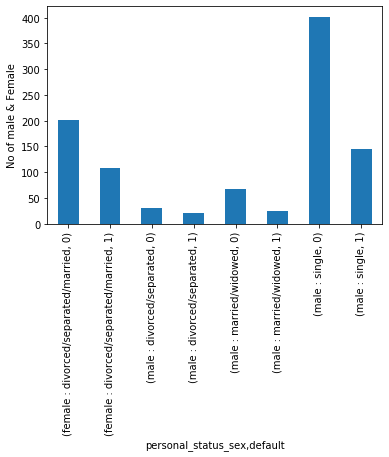

In [381]:
df1=df1.age['count']
df1=df1.plot.bar()
df1.set_ylabel('No of male & Female')
plt.show


# prediction by using Logistic Regression model

In [382]:
feature= df[['credit_amount', 'age']]
target=df['default']

feature_train,feature_test,target_train,target_test=train_test_split(feature,target,test_size=0.3)
model=LogisticRegression()
model.fit=model.fit(feature_train,target_train)
prediction=model.predict(feature_test)

print('confusion matrix is \n {}'.format(confusion_matrix(target_test,prediction)))
print('accuracy score is  {}'.format(accuracy_score(target_test,prediction)))
LR= accuracy_score(target_test,prediction)

confusion matrix is 
 [[206   7]
 [ 78   9]]
accuracy score is  0.7166666666666667


C:\Users\HP User\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


# prediction by using Support vector machine model

In [383]:
feature= df[['credit_amount', 'age']]
target=df['default']

feature_train,feature_test,target_train,target_test=train_test_split(feature,target,test_size=0.3)
model=svm.SVC(gamma=0.001, C=100 )
model.fit=model.fit(feature_train,target_train)
prediction=model.predict(feature_test)

print('confusion matrix is \n {}'.format(confusion_matrix(target_test,prediction)))
print('accuracy score is  {}'.format(accuracy_score(target_test,prediction)))
SVM=accuracy_score(target_test,prediction)

confusion matrix is 
 [[159  38]
 [ 88  15]]
accuracy score is  0.58


# prediction by using Random Forest Classifier

In [384]:
feature= df[['credit_amount', 'age']]
target=df['default']

feature_train,feature_test,target_train,target_test=train_test_split(feature,target,test_size=0.3)
model=RandomForestClassifier(n_estimators=1000,max_features='sqrt')
model.fit=model.fit(feature_train,target_train)
prediction=model.predict(feature_test)

print('confusion matrix is \n {}'.format(confusion_matrix(target_test,prediction)))
print('accuracy score is  {}'.format(accuracy_score(target_test,prediction)))
RFC=accuracy_score(target_test,prediction)

confusion matrix is 
 [[161  57]
 [ 59  23]]
accuracy score is  0.6133333333333333


# prediction by using Gaussian Naive Bayes

In [385]:
feature= df[['credit_amount', 'age']]
target=df['default']

feature_train,feature_test,target_train,target_test=train_test_split(feature,target,test_size=0.3)
model=GaussianNB()
model.fit=model.fit(feature_train,target_train)
prediction=model.predict(feature_test)

print('confusion matrix is \n {}'.format(confusion_matrix(target_test,prediction)))
print('accuracy score is  {}'.format(accuracy_score(target_test,prediction)))
GNB=accuracy_score(target_test,prediction)

confusion matrix is 
 [[199  11]
 [ 84   6]]
accuracy score is  0.6833333333333333


# Visualization of different model with compairing accuracy score

In [386]:
Series1=pd.Series(['LR', LR], index=['Model','Accuracy'])
Series2=pd.Series(['SVM', SVM], index=['Model','Accuracy'])
Series3=pd.Series(['RFC', RFC], index=['Model','Accuracy'])
Series4=pd.Series(['GNB', GNB], index=['Model','Accuracy'])

In [388]:
df2=pd.DataFrame([Series1,Series2,Series3,Series4])
df2['Percentage Accuracy']=df2['Accuracy']*100
df2


,Model,Accuracy,Percentage Accuracy
0,LR,0.716667,71.666667
1,SVM,0.580000,58.000000
2,RFC,0.613333,61.333333
3,GNB,0.683333,68.333333


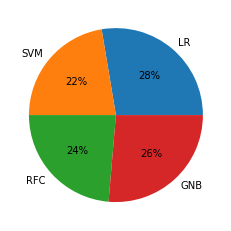

In [389]:
plt.pie(df2['Percentage Accuracy'],labels=df2['Model'],  autopct='%1.0f%%')
plt.show()

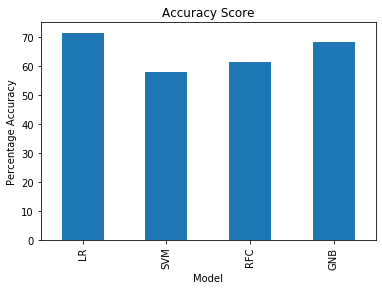

In [390]:
df3=df2.set_index('Model')
df3=df3['Percentage Accuracy']
df3=df3.plot.bar(title='Accuracy Score')
df3=df3.set_ylabel('Percentage Accuracy')
plt.show()

In [391]:
print('The Maximum Percentage Accuracy is {}'.format(np.max(df2['Percentage Accuracy'])))

The Maximum Percentage Accuracy is 71.66666666666667


In [403]:
df2

,Model,Accuracy,Percentage Accuracy
0,LR,0.716667,71.666667
1,SVM,0.580000,58.000000
2,RFC,0.613333,61.333333
3,GNB,0.683333,68.333333


In [405]:
for i,j in df2[['Model','Percentage Accuracy']]:
    print('The Best model is {} with having Percentage Accuracy {}'.format(i,j))
    
        
                

ValueError: too many values to unpack (expected 2)